/var/folders/h1/r8b3l5213qj7kg8ltrdp83x80000gn/T/ipykernel_885/3942224491.py:51: RuntimeWarning: invalid value encountered in sqrt
  self.beta = np.sqrt(arg(self.r))


Ready for the parameter a= 0.3
Ready for the parameter a= 0.6
Ready for the parameter a= 0.9
Ready for the parameter a= 0.99


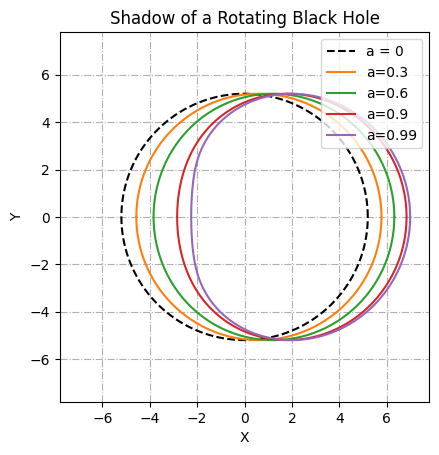

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

class Shadow(object):
    def __init__(self, M = 1. ,  a = 0.5, inc = np.pi/2):
        
        # Parameters of the Metric
        self.M = M          # Mass of the central body in SolarMasses
        self.a = a          # Spin Parameter (0<=a<=1)
        self.inc = inc      # Inclination angle in radians
        
        # Event Horizon
        self.rH = self.M + np.sqrt(self.M**2 - self.a**2) 
                        
        # Auxiliar Function
        def Delta(r):
            return r**2 - 2*self.M* r + self.a**2
        
        # Angular Momentum
        def xi(r):
            return (self.M*(r**2 - self.a**2) 
                - r*Delta(r))/(self.a*(r - self.M))  
        # Carter Constant
        def eta(r):
            return ((r**3)*(4*self.M*Delta(r) 
            - r*(r-self.M)**2))/(self.a**2 * (r - self.M)**2)   
        
        
        # Radius of the corresponding Schwarzschild BH
        self.Rcircle = np.sqrt(27 * self.M**2)
        
        # Obtaining the Celestial Coordinates
        
        # Argument in the square root of beta
        def arg(r):
            return eta(r) + self.a**2 * np.cos(self.inc)**2 
            - (xi(r))**2 * (np.cos(self.inc)/np.sin(self.inc))**2
        
        # Root finding of the function arg(r) to define the limits in the plot        
        r0 = newton(arg, self.rH)       
        r1 = newton(arg, 4*self.rH)
                
        # Range of the parameter r for the plot 
        self.r = np.linspace(r0 ,r1,100000)
        
        # Coordinate alpha
        self.alpha = - xi(self.r) / np.sin(self.inc)
        
        #coordinate beta
        self.beta = np.sqrt(arg(self.r))
        
        print('Ready for the parameter a=',self.a)





# Parameters of the BH       
M = 1.
a = [0.3, 0.6, 0.9, 0.99]

# Radius of the corresponding Schwarzschild BH
Rcircle = np.sqrt(27 * M**2)

# Plot of the orbit
fig, ax = plt.subplots()

#Axis information
ax.set_title('Shadow of a Rotating Black Hole')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Axis range and aspect (square)
axrange=1.5*Rcircle
ax.axis([-axrange,axrange,-axrange,axrange])
ax.set_aspect('equal', 'box')

# Grid ON
ax.grid(True, linestyle='-.')

# Plot of the Schwarzschild's BH shadow for comparison
t = np.linspace(0, 2*np.pi, 100000)
ax.plot(Rcircle * np.cos(t), Rcircle * np.sin(t),'k--', label='a = 0')

# Inizialization of the variables for the plots
labels=[]
colors=[]
bh =[]

# Main Loop for plotting

for i in range(0, len(a)):
    # Calculation of the Shadow
    bh.append(Shadow(M , a=a[i]))
    # Label of the shadow plot
    labels.append('a='+ str(bh[i].a))
    # Colors for the plots
    colors.append('C'+str(i+1)+'-')

    # Plot the shadow of the rotating BH
    ax.plot(bh[i].alpha,bh[i].beta, colors[i], label=labels[i])
    ax.plot(bh[i].alpha,-bh[i].beta, colors[i])

ax.legend(loc='upper right')
#plt.show()
plt.savefig('shadow.png')